# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_group = study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.DataFrame({
     "Mean Tumor Volume":data_group.mean(),
    "Median Tumor Volume":data_group.median(),
    "Tumor Volume Variance":data_group.var(),
    "Tumor Volume STD Dev":data_group.std(),
    "Tumor Volume STD Err":data_group.sem()   
})


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD Dev,Tumor Volume STD Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_group.agg(["mean","median","var","std","sem"])
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

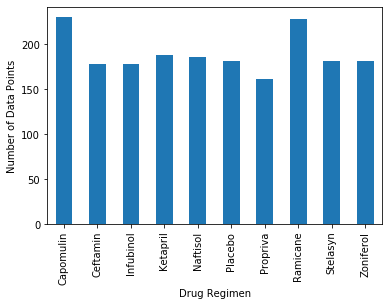

In [39]:
num_data_points = data_group.count().plot(kind='bar').set_ylabel("Number of Data Points")
num_data_points
plt.show()

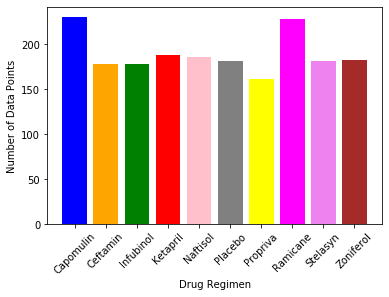

In [40]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y = data_group.count().array
x = data_group.count().index.array
plt.bar(x,y,color=["blue","orange","green","red","pink","gray","yellow","magenta","violet","brown"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.savefig("Drug_Regimem_Treatment.png")
plt.show()


In [41]:
#Finds the quantitiy of Male vs. Female mice
study_data_complete.groupby("Sex").count()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


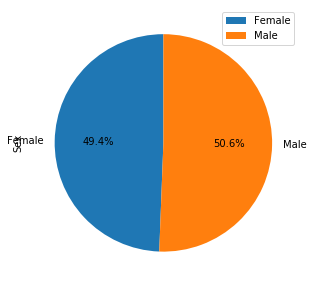

In [50]:
#Finds the quantitiy of Male vs. Female mice
from pandas import DataFrame
Data = {"Sex": [935,958]}
df = DataFrame(Data,columns=['Sex'],index =['Female','Male'])
df.plot.pie(y="Sex", figsize=(5,5),autopct='%1.1f%%', startangle=90)


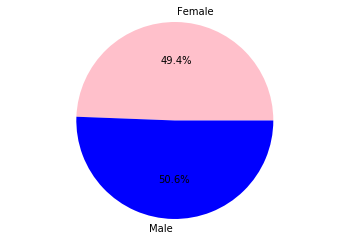

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
gender = ["Female", "Male"]

# The values of each section of the pie chart
mice_sex = [935,958]

# The colors of each section of the pie chart
colors = ["pink","blue"]

#Tell matplotlib to create a pie cahart based upon the above data
plt.pie( mice_sex, labels=gender, colors=colors, autopct='%1.1f%%')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Quantitatively determine capomulin outliers


In [ ]:
# Quantitatively determine ramicane outliers


In [ ]:
# Quantitatively determine infubinol outliers


In [ ]:
# Quantitatively determine ceftamin outliers


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

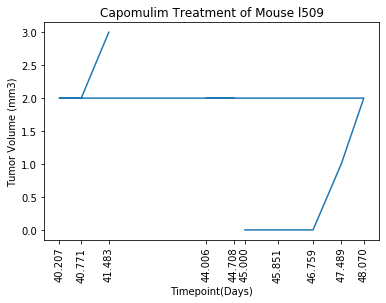

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# get data for Mouse l509 and all it's timepoints
one_mouse = study_data_complete.set_index("Mouse ID")
mouse_df = one_mouse.loc['l509', :]
mouse_df.head ()

time = mouse_df.iloc[:,1]
volume = mouse_df.iloc[:,2]
plt.plot(time,volume)
plt.xticks(time, rotation=90)

plt.title("Capomulim Treatment of Mouse l509")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()




In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [25]:
# get data for the Capomulin regimen 
one_drug = study_data_complete.set_index("Drug Regimen")
capo_df = one_drug.loc['Capomulin', :]
capo_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Capomulin,j246,0,45.0,0,Female,21,21
Capomulin,r554,0,45.0,0,Female,8,17
Capomulin,s185,0,45.0,0,Female,3,17
Capomulin,b742,0,45.0,0,Male,7,21


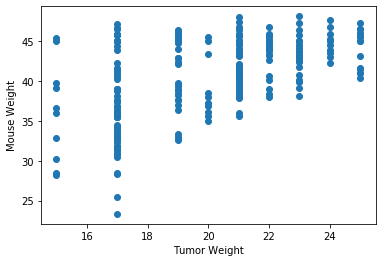

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = capo_df['Weight (g)']
y_values = capo_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel("Tumor Weight")
plt.ylabel("Mouse Weight")
plt.show()


## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
vc_slope, vc_int, vc_r, vc_p, vc_std_err





(0.9609669432428355,
 21.489827213299566,
 0.5256995552077169,
 9.605446629501521e-18,
 0.10298279892023657)

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and average tumor volume is {linier_corr}.")
